# Graph Theory

In [ ]:
import numpy as np
import networkx as nx # Graph library
import matplotlib.pyplot as plt

### Basic Graphs

In [2]:
## Basic Graphs
G1= nx.Graph() # Simple undirected graph
G2=nx.DiGraph() # Simple directed graph
G3= nx.MultiGraph() # Multiple edges between nodes (Undirected)
G4= nx.MultiDiGraph() # Multiple edges between nodes (Directed)

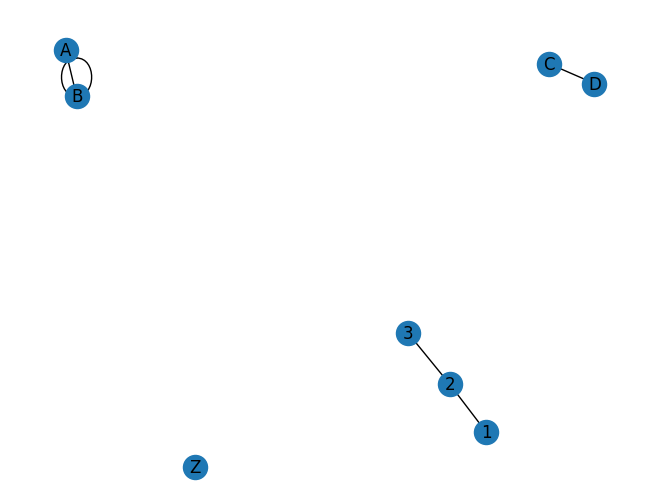

In [3]:
# We can add edges to the graphs sequentially
G1= nx.Graph()
G1.add_edge(1,2) # Add an edge between node 1 and 2

# Adding the weight to an edge
G1.add_edge(2,3, weight= 0.6)

# Nodes can also be letters
G1.add_edge('A', 'B')
G1.add_edge("B", 'B')
G1.add_edge('C', 'D')
G1.add_node('Z') # We can add single nodes

# Visualize the graph
nx.draw_spring(G1, with_labels=True)

`nx.draw_spring()` uses a layout algorithm (Fruchterman-Reingold force-directed algorithm) to position the nodes in the graph. It generally produces more visually appealing and interpretable layouts for many graphs and are therefore used in publications/research.

`nx_draw()` can also be used. It uses a default circular layout if no positions (`pos`) argument is provided.

![Graph Layouts](https://networkx.org/grave/latest/_images/sphx_glr_plot_layout_001.png)



Notice the graph(s) is majorly disconnected. We can add multiple edges on a single graph using an edge list which is a list of node pairs within a tuple. 



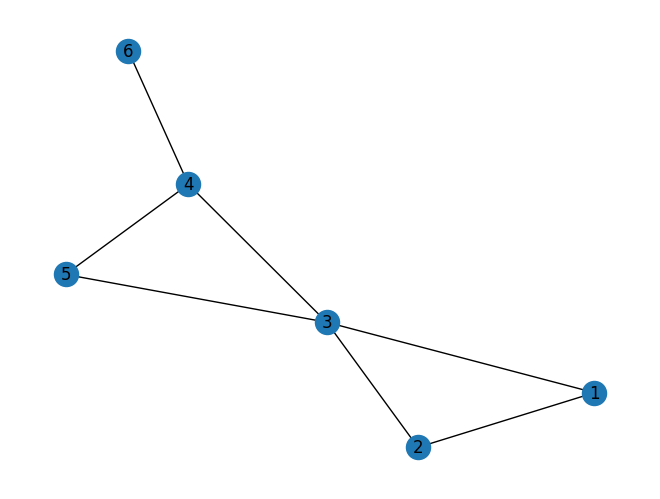

In [4]:
edge_list= [(1, 2), (2, 3), (3, 4), (4, 5), (4, 6), (3, 5), (1, 3)]

Gz= nx.from_edgelist(edge_list)

nx.draw_spring(Gz, with_labels= True)

## Alternatively...
# Gz= nx.Graph()
# Gz.add_edges_from(edge_list)

# nx.draw_spring(Gz, with_labels= True)

We can also obtain an adjacency matrix of the plotted graph above. An adjacency matrix is a square matrix used to represent a finite graph. It shows the weighted connection values between nodes.

In [5]:
## Adjacency Matrix
print(nx.adjacency_matrix(Gz))

<Compressed Sparse Row sparse array of dtype 'int32'
	with 14 stored elements and shape (6, 6)>
  Coords	Values
  (0, 1)	1
  (0, 2)	1
  (1, 0)	1
  (1, 2)	1
  (2, 0)	1
  (2, 1)	1
  (2, 3)	1
  (2, 4)	1
  (3, 2)	1
  (3, 4)	1
  (3, 5)	1
  (4, 2)	1
  (4, 3)	1
  (5, 3)	1


We can also create graph from an adjacency matrix using NumPy then use the matrix to create a graph.


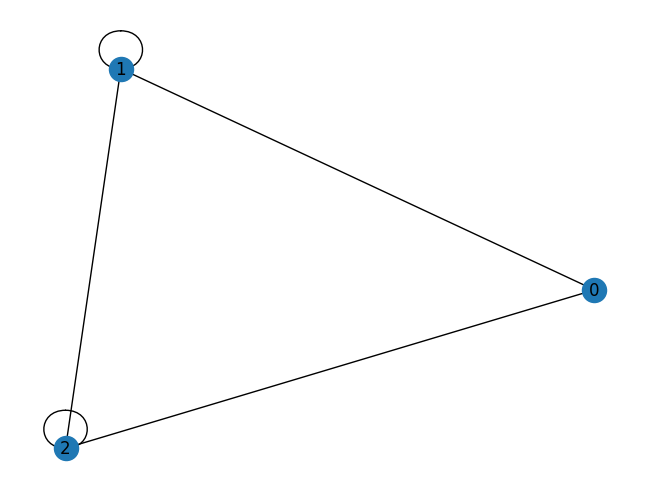

In [6]:
## Graph from NumPy adjacency matrix
G= nx.from_numpy_array(np.array([[0,1,0],
                                 [1,1,1], 
                                 [1,0,1]]))

nx.draw_spring(G, with_labels=True)
 # Also a good way to graw Markov Chains

### Graph Layouts
There exist multiple layouts for drawing graphs

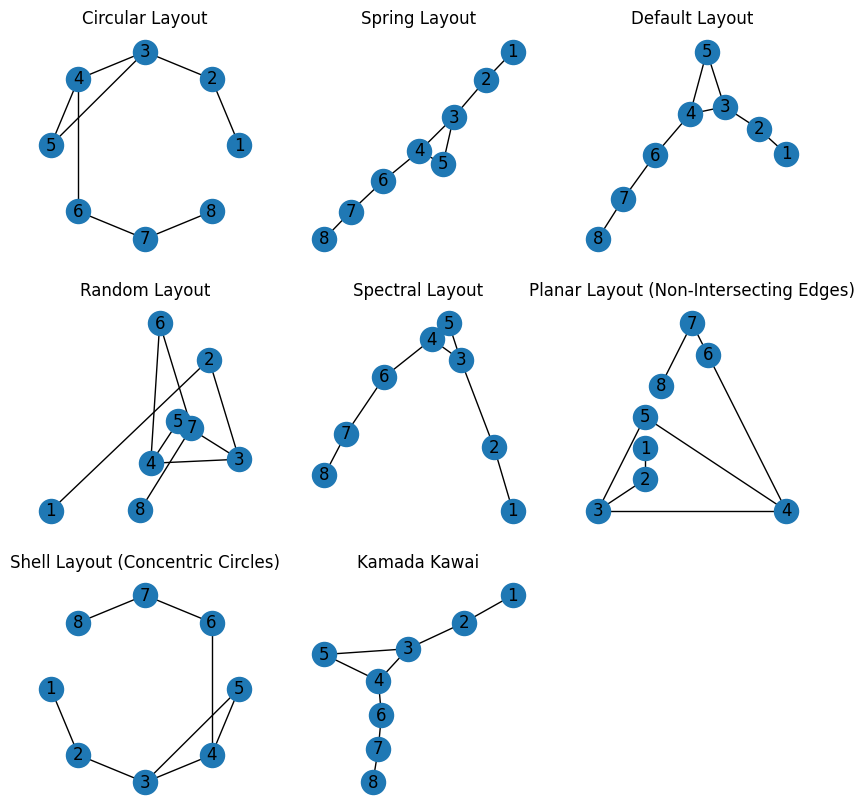

In [ ]:
edge_list= [(1, 2), (2, 3), (3, 4), (4, 5), (4, 6), (6,7), (7,8),(3, 5)]

G= nx.from_edgelist(edge_list)


## We want to plot multiple graphs under one canvas
fig, axes= plt.subplots(3,3, figsize=(10,10))

nx.draw_circular(G, with_labels= True, ax= axes[0,0])
axes[0,0].set_title('Circular Layout')

nx.draw_spring(G, with_labels= True, ax= axes[0,1])
axes[0,1].set_title('Spring Layout')

nx.draw_random(G, with_labels= True, ax= axes[1,0])
axes[1,0].set_title('Random Layout')

nx.draw_spectral(G, with_labels= True, ax= axes[1,1])
axes[1,1].set_title('Spectral Layout')

nx.draw_shell(G, with_labels= True, ax= axes[2,0])
axes[2,0].set_title('Shell Layout (Concentric Circles)')

nx.draw_kamada_kawai(G, with_labels= True, ax= axes[2,1])
axes[2,1].set_title('Kamada Kawai')

nx.draw(G, with_labels= True, ax= axes[0,2])
axes[0,2].set_title('Default Layout')

nx.draw_planar(G, with_labels= True, ax=axes[1,2])
axes[1,2].set_title('Planar Layout (Non-Intersecting Edges)')
 # So that no edge crosses each other

# Removing the last axis as it has no plot
axes[2,2].set_axis_off()

## Alternatively...
# nx.draw(G, with_labels= True, pos= '')
# possible 'pos' arguments can be: layouts= ['circular', 'spring', 'random', 'spectral', 'shell', 'kamada_kawai']


We could also try to define a graph that will have intersecting edges. Note how `draw_planar()` plots the graph ensuring no crossing edges

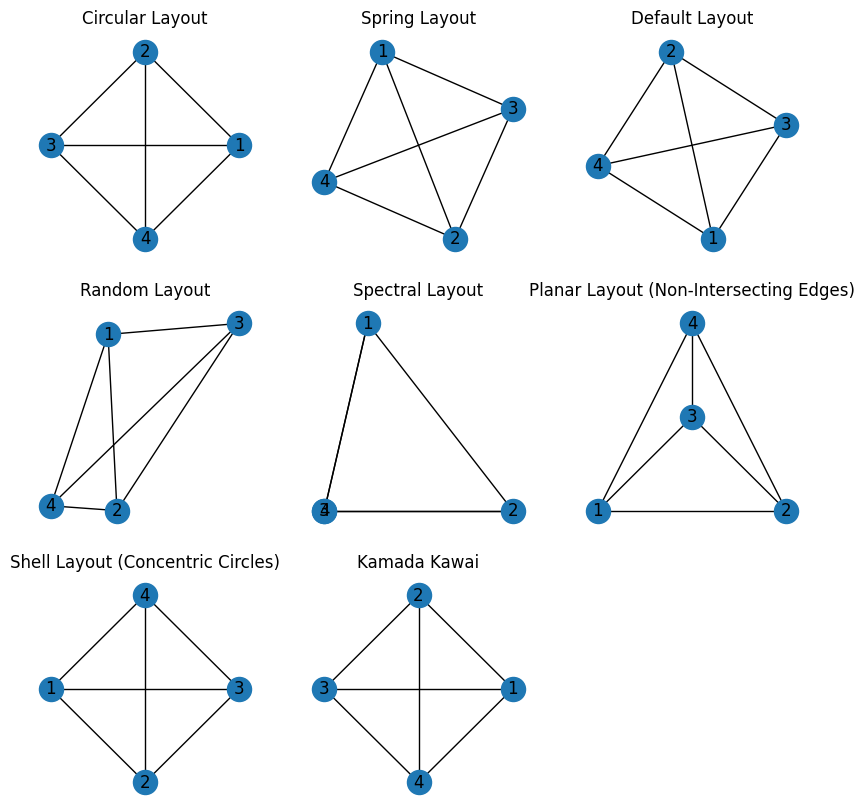

In [ ]:
edge_list= [(1,2), (2,3), (3,4), (4,1), (1,3), (2,4)]

G= nx.from_edgelist(edge_list)


## Plotting multiple graph layouts under one canvas
fig, axes= plt.subplots(3,3, figsize=(10,10))

nx.draw_circular(G, with_labels= True, ax= axes[0,0])
axes[0,0].set_title('Circular Layout')

nx.draw_spring(G, with_labels= True, ax= axes[0,1])
axes[0,1].set_title('Spring Layout')

nx.draw_random(G, with_labels= True, ax= axes[1,0])
axes[1,0].set_title('Random Layout')

nx.draw_spectral(G, with_labels= True, ax= axes[1,1])
axes[1,1].set_title('Spectral Layout')

nx.draw_shell(G, with_labels= True, ax= axes[2,0])
axes[2,0].set_title('Shell Layout (Concentric Circles)')

nx.draw_kamada_kawai(G, with_labels= True, ax= axes[2,1])
axes[2,1].set_title('Kamada Kawai')

nx.draw(G, with_labels= True, ax= axes[0,2])
axes[0,2].set_title('Default Layout')

nx.draw_planar(G, with_labels= True, ax=axes[1,2])
axes[1,2].set_title('Planar Layout (Non-Intersecting Edges)')
 # So that no edge crosses each other

 # Removing the last axis as it has no plot
axes[2,2].set_axis_off()

## Alternatively...
# nx.draw(G, with_labels= True, pos= '')
# possible 'pos' arguments can be: layouts= ['circular', 'spring', 'random', 'spectral', 'shell', 'kamada_kawai']


A faster way of drawing closed graphs is using `nx.complete_graph(n)`. At higher values of *n*. `draw_planar()` will bring a exception.

NetworkXException: G is not planar.

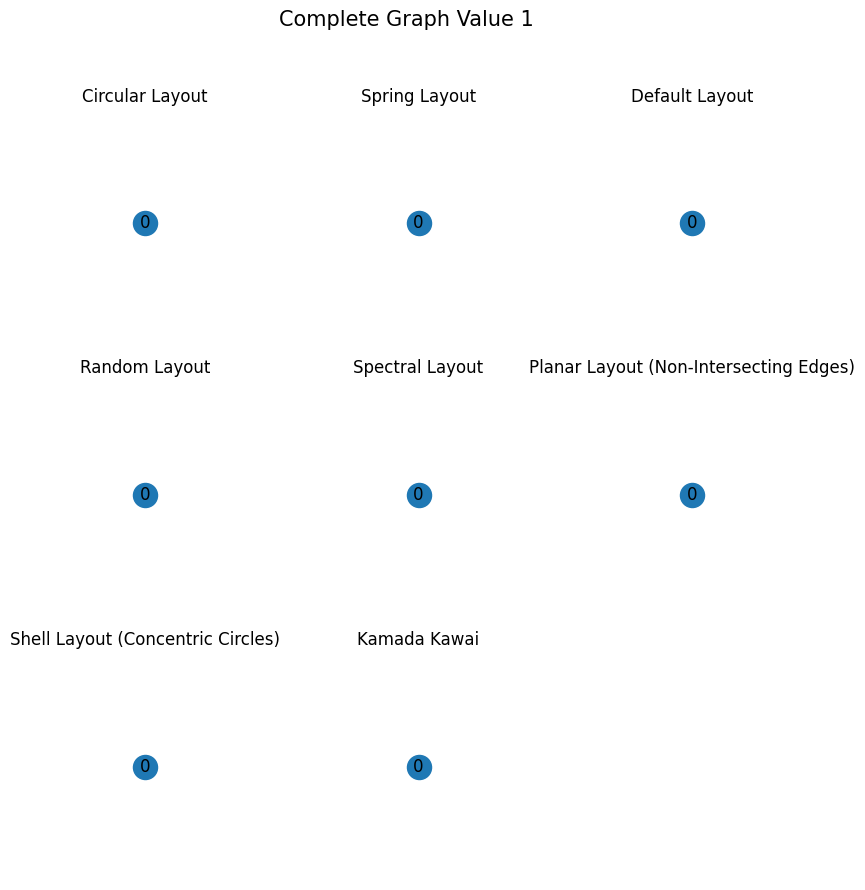

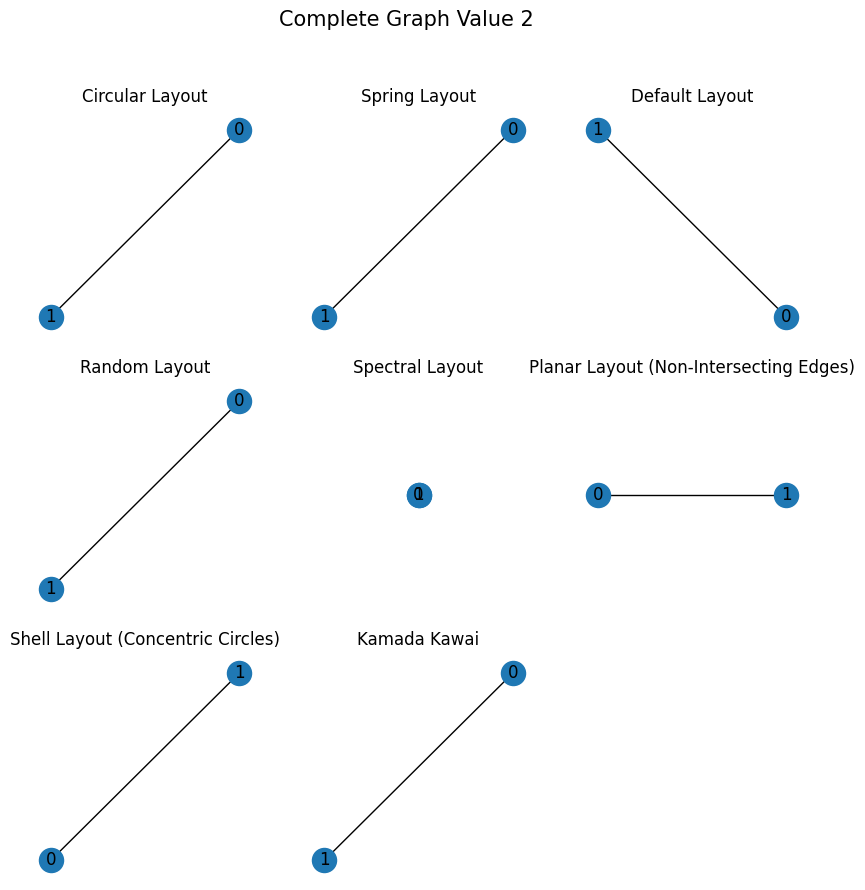

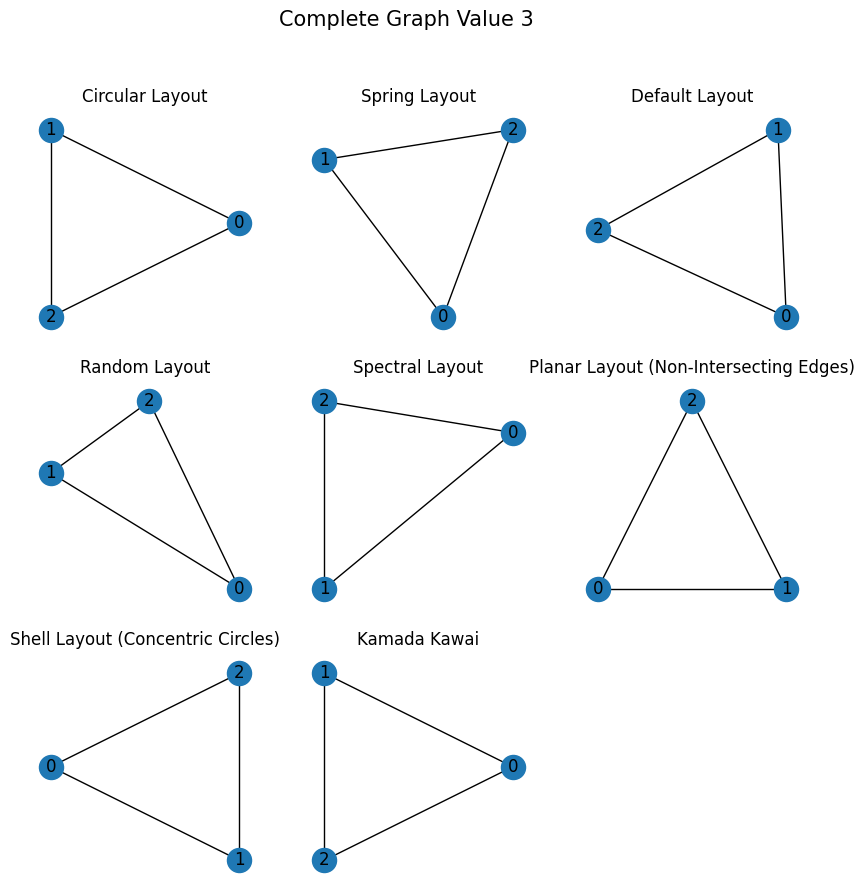

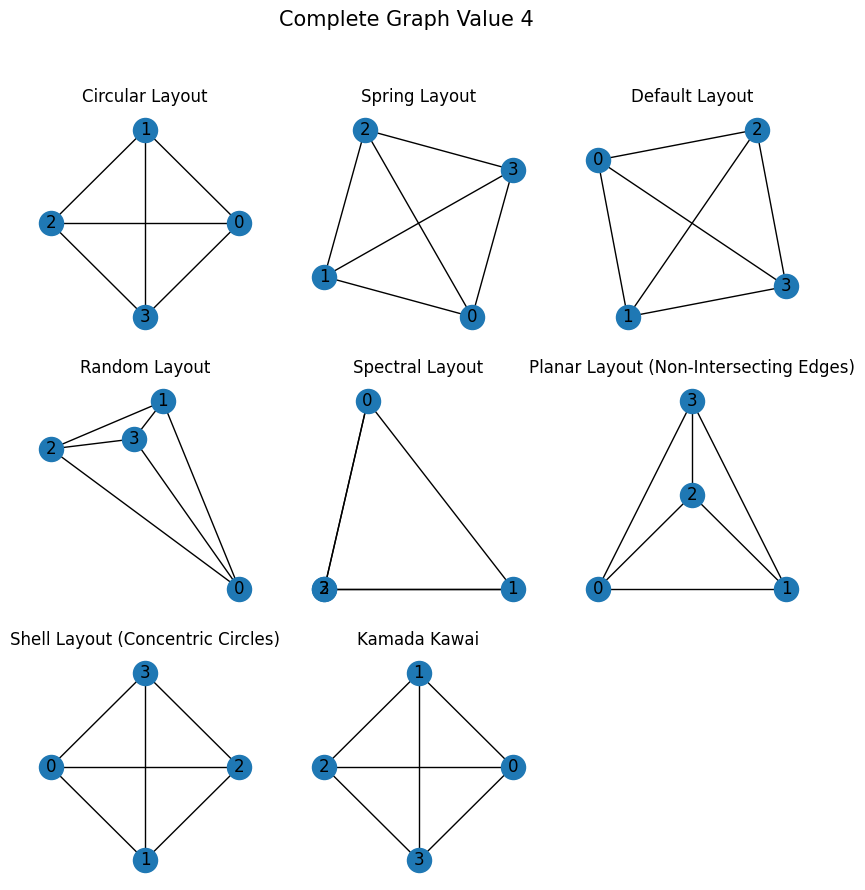

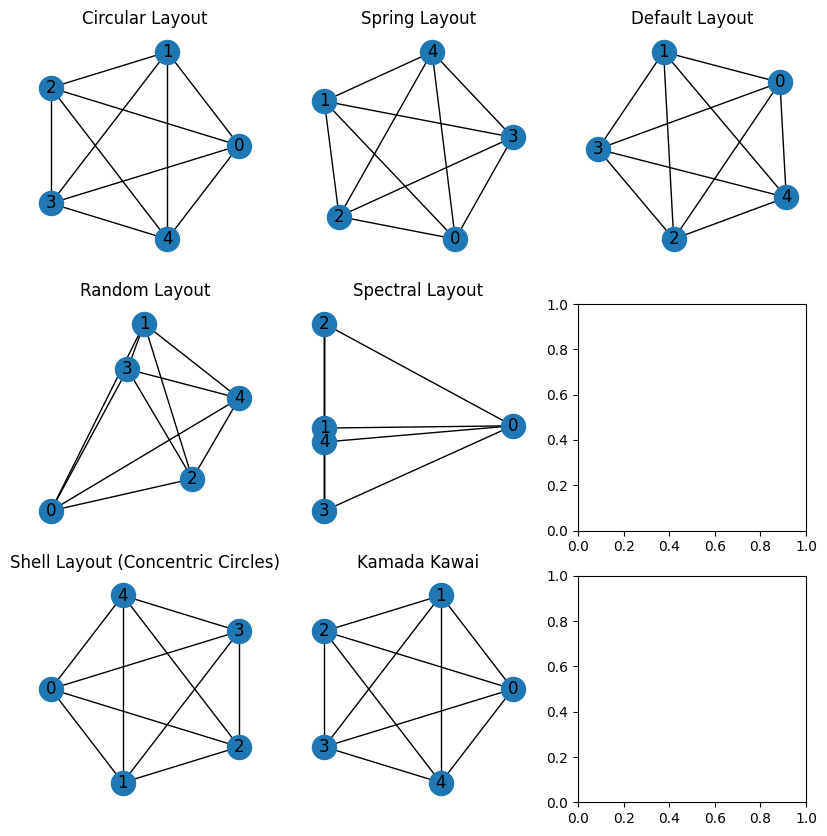

In [ ]:
values= [1,2,3,4,5,6]

for n in values:
    G= nx.complete_graph(n)
    fig, axes= plt.subplots(3,3, figsize=(10,10))

    nx.draw_circular(G, with_labels= True, ax= axes[0,0])
    axes[0,0].set_title('Circular Layout')

    nx.draw_spring(G, with_labels= True, ax= axes[0,1])
    axes[0,1].set_title('Spring Layout')

    nx.draw_random(G, with_labels= True, ax= axes[1,0])
    axes[1,0].set_title('Random Layout')

    nx.draw_spectral(G, with_labels= True, ax= axes[1,1])
    axes[1,1].set_title('Spectral Layout')

    nx.draw_shell(G, with_labels= True, ax= axes[2,0])
    axes[2,0].set_title('Shell Layout (Concentric Circles)')

    nx.draw_kamada_kawai(G, with_labels= True, ax= axes[2,1])
    axes[2,1].set_title('Kamada Kawai')

    nx.draw(G, with_labels= True, ax= axes[0,2])
    axes[0,2].set_title('Default Layout')

    nx.draw_planar(G, with_labels= True, ax=axes[1,2]) # Error at higher values of 'n'
    axes[1,2].set_title('Planar Layout (Non-Intersecting Edges)')
    
    axes[2,2].set_axis_off()

    # Add a title to the enitre canvas
    fig.suptitle(f'Complete Graph Value {n}', fontsize= 15)
    

### Degree of a Node
The **degree** of a vertex/edge is the number of edges it is an endpoint of. For closed graphs as plotted above, each node has the same number of degrees.

In the case of incomplete/open graphs, the degrees between nodes may vary.
 

Dictionary of nodes and their degrees
{'a': 2, 'b': 6, 'c': 2, 'd': 6, 'e': 1, 'f': 3}


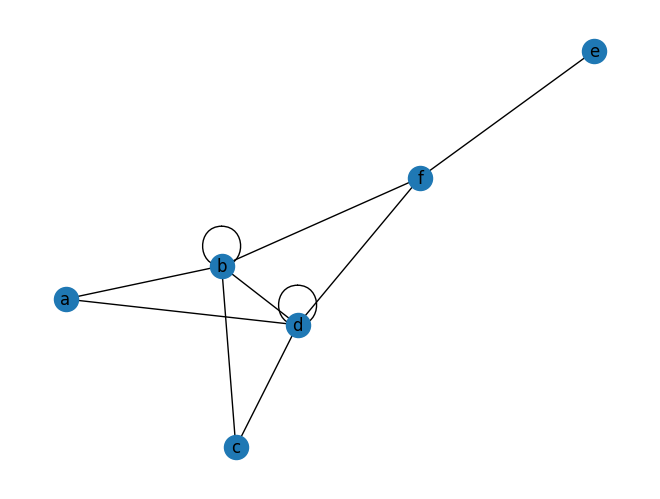

In [ ]:
## Checking the degrees of vertices
edge_list= [('a', 'b'), ('b c'.split()), ('c d'.split()), 
            ('b d'.split()), ('e f'.split()), ('b f'.split()), ('a d'.split()),
            ('d f'.split()), ('d d'.split()), ('a d'.split()), ('b', 'b')]

G= nx.from_edgelist(edge_list)
nx.draw_spring(G, with_labels= True)

print('Dictionary of nodes and their degrees')
print(dict(G.degree))
 # We use a dictionary so that we can access the degree of a individual node


In The case of directed graphs, the number of degrees of a node can be separated into in degrees (number of edges coming into the node) and out degrees (number of edges going out of the node).

In Degrees
{'a': 0, 'b': 2, 'c': 1, 'd': 4, 'e': 0, 'f': 3}

Out Degrees
{'a': 2, 'b': 4, 'c': 1, 'd': 2, 'e': 1, 'f': 0}


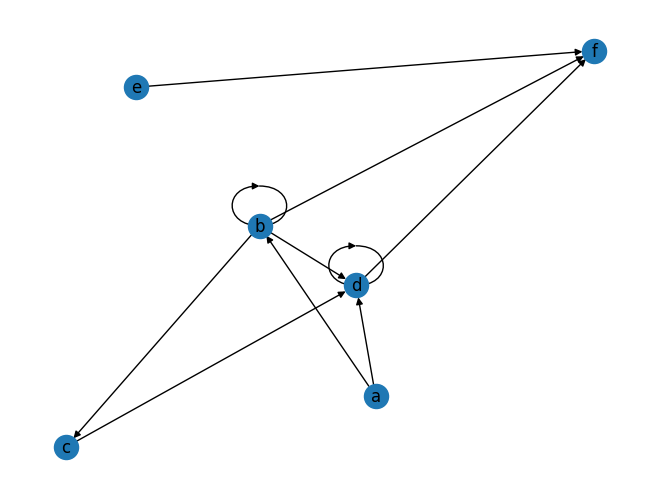

In [61]:
edge_list= [('a', 'b'), ('b c'.split()), ('c d'.split()), 
            ('b d'.split()), ('e f'.split()), ('b f'.split()), ('a d'.split()),
            ('d f'.split()), ('d d'.split()), ('a d'.split()), ('b', 'b')]

G= nx.DiGraph()
G.add_edges_from(edge_list)
nx.draw_spring(G, with_labels= True)

print('In Degrees')
print(dict(G.in_degree))
print()
print('Out Degrees')
print(dict(G.out_degree))
 # We use a dictionary so that we can access the degree of a individual node


### Shortest Path
Finding the shortest path between two nodes in a graph.

Shortest Path: [1, 2, 3, 7, 8]


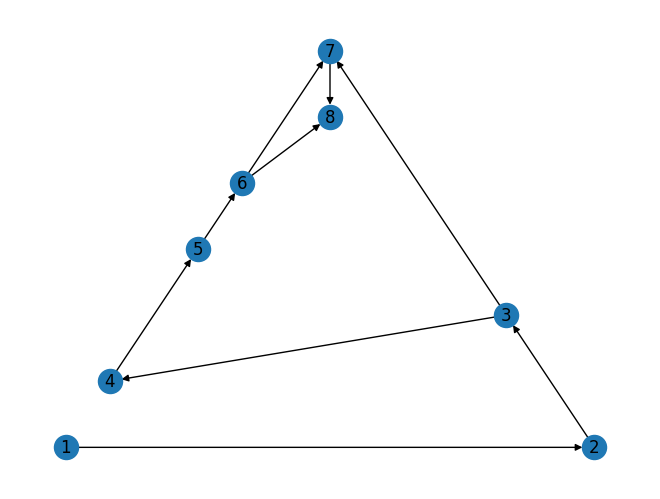

In [92]:
edge_list= [(1,2), (2,3), (3,4), (4,5), (5,6), (6,7), (7,8), # Path 1,2,3,4,5,6,7,8
            (3,7), # Path from 3 to 7
            (6,8)] # Path from 6 to 8

# The goal is then tofind the shortest path from 1 to 8
print('Shortest Path:', nx.shortest_path(G, 1, 8))

G= nx.DiGraph()
G.add_edges_from(edge_list)
nx.draw_planar(G, with_labels= True)


### Centrality
Centrality measures are used in graph theory to quantify the importance or influence of a node within a network. It recognizes nodes that are important or central among the whole list of other nodes in a graph. Examples of centrality measures include:

- **Degree Centrality**: This measure quantifies a node's importance based solely on the number of connections it has. A node with more connections (higher degree) is considered more central. 
- **Closeness Centrality:** Calculates the average distance from a node to all other nodes in the network. A node with a shorter average distance to other nodes is considered more central, as it is closer to all other nodes in the network
- **Betweenness Centrality:** Quantifies a node's importance based on how often it lies on the shortest paths between other nodes in the graph. A node that lies on many shortest paths is considered more central, as it controls the flow of information between different parts of the network
- **Eigenvector Centrality:** Measures a node's influence within a network by considering the influence of its neighbors. It quantifies how well-connected a node is to other important nodes in the network. A node's eigenvector centrality score is higher if it's connected to nodes that also have high scores

Degree Centrality: {1: 0.14, 2: 0.29, 3: 0.43, 4: 0.29, 5: 0.29, 6: 0.43, 7: 0.43, 8: 0.29}
Closeness Centrality: {1: 0.0, 2: 0.14, 3: 0.19, 4: 0.21, 5: 0.23, 6: 0.24, 7: 0.43, 8: 0.44}
Betweenness Centrality: {1: 0.0, 2: 0.14, 3: 0.24, 4: 0.14, 5: 0.14, 6: 0.1, 7: 0.07, 8: 0.0}


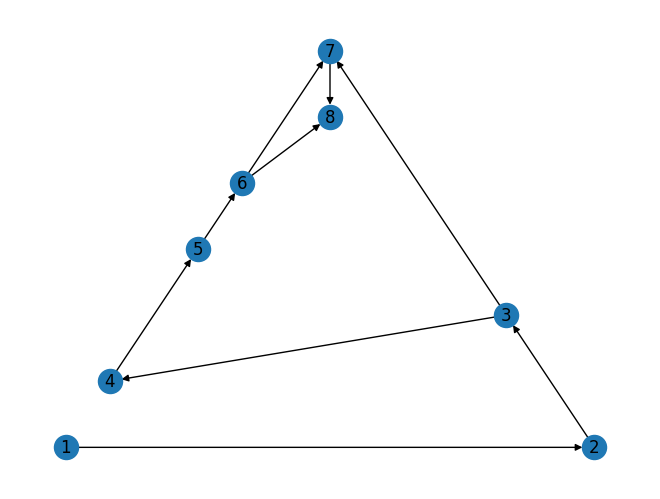

In [ ]:
edge_list= [(1,2), (2,3), (3,4), (4,5), (5,6), (6,7), (7,8), # Path 1,2,3,4,5,6,7,8
            (3,7), # Path from 3 to 7
            (6,8)] # Path from 6 to 8


G= nx.DiGraph()
G.add_edges_from(edge_list)
nx.draw_planar(G, with_labels= True)

print('Degree Centrality:', {node: round(centrality, 2)  
                             for node, centrality in nx.degree_centrality(G).items()})
 # Since we want the centrality values to be in 2 decimal places
 # items.() allows us to iterate over the keys and values of the dictionary

print('Closeness Centrality:', {node: round(centrality, 2)  
                             for node, centrality in nx.closeness_centrality(G).items()})

# print('Eignevector Centrality:', {node: round(centrality, 2)  for node, centrality in nx.eigenvector_centrality(G, max_iter=500, tol=1e-06).items()})

print('Betweenness Centrality:', {node: round(centrality, 2)  
                             for node, centrality in nx.betweenness_centrality(G).items()})

Let's see how for example betweenness centrality can vary between nodes. We can create two separate complete graphs and have a node acting as the connection (bridge) between the two graphs.

Degree Centrality: {0: 0.4, 1: 0.4, 2: 0.4, 3: 0.5, 4: 0.4, 'A': 0.5, 'B': 0.4, 'C': 0.4, 'D': 0.4, 'E': 0.4, 'X': 0.2}
Closeness Centrality: {0: 0.4, 1: 0.4, 2: 0.4, 3: 0.53, 4: 0.4, 'A': 0.53, 'B': 0.4, 'C': 0.4, 'D': 0.4, 'E': 0.4, 'X': 0.56}
Eignevector Centrality: {0: 0.31, 1: 0.31, 2: 0.31, 3: 0.34, 4: 0.31, 'A': 0.34, 'B': 0.31, 'C': 0.31, 'D': 0.31, 'E': 0.31, 'X': 0.16}
Betweenness Centrality: {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.53, 4: 0.0, 'A': 0.53, 'B': 0.0, 'C': 0.0, 'D': 0.0, 'E': 0.0, 'X': 0.56}


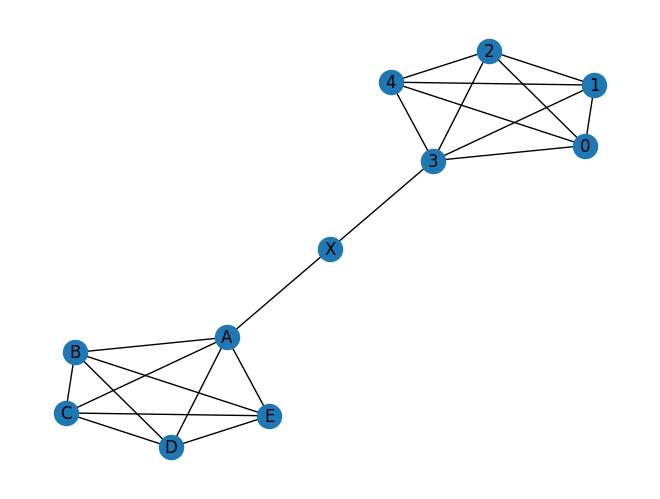

In [122]:
## The two complete graphs
G1= nx.complete_graph(5)
G2= nx.complete_graph(5)

## Both nodes are numerical so we can rename G2's nodes to letters
G2= nx.relabel_nodes(G2, {0:'A', 1:'B', 2:'C', 3:'D', 4:'E', 5:'D'})

## Adding the connector between G1 and G2
G_connector= nx.from_edgelist([(3, 'X'), ('X', 'A')])

## The full combined graph
G= nx.compose_all([G1, G2, G_connector])

## Visualize the combined graph
nx.draw_kamada_kawai(G, with_labels= True)

## We can then asses the various centralities of all the nodes in the combined graph
print('Degree Centrality:', {node: round(centrality, 2)  
                             for node, centrality in nx.degree_centrality(G).items()})

print('Closeness Centrality:', {node: round(centrality, 2)  
                             for node, centrality in nx.closeness_centrality(G).items()})

print('Eignevector Centrality:', {node: round(centrality, 2)  for node, centrality in nx.eigenvector_centrality(G, max_iter=500, tol=1e-06).items()})

print('Betweenness Centrality:', {node: round(centrality, 2)  
                             for node, centrality in nx.betweenness_centrality(G).items()})

Note how node X has the:
- highest closeness centrality (shortest average distance to other nodes in the graph)
- highest betweenness centrality (part of the most shortest paths between other nodes)
- lowest degree centrality (has the least number of edges)
- lowest eigenvector centrality (not connected to many other important nodes)

### Graphs Metrics: Density & Diameter
**Density** is ratio between the number of edges in a graph and the maximum number of edges that the graph can contain. It's a measure of how "full" or "connected" a graph is. A high density indicates a large number of connections, while a low density means fewer connections.

**Diameter** of a graph is the length of the shortest path between the most distanced nodes (ie- the longest shortest path between any two vertices (nodes) in the graph). It is essentially the maximum distance (by number of edges or sum of weights) between any two points within the network.

In [125]:
## For the above combined graph G
print('Graph Density:', nx.density(G))
 # 40% of the nodes in the graph are connected
 # On a complete graph, the density should be 1 since all the nodes would be connected
print('Graph Diameter:', nx.diameter(G))
 # eg- Between node C and 1 there are 4 edges 

Graph Density: 0.4
Graph Diameter: 4


### Eulerian Path & Circuit
A **Eulerian Path** is a path that a path that traverses every edge of a graph exactly once. It from one vertex and ends at another while an **Eulerian Circuit** still traverses every edge once but starts and ends at the same vertex.

Eulerian Path: [(3, 0), (0, 1), (1, 2), (2, 0), (0, 4), (4, 1), (1, 3), (3, 2), (2, 4), (4, 3), (3, 'X'), ('X', 'A'), ('A', 'B'), ('B', 'C'), ('C', 'A'), ('A', 'D'), ('D', 'B'), ('B', 'E'), ('E', 'C'), ('C', 'D'), ('D', 'E'), ('E', 'A')]


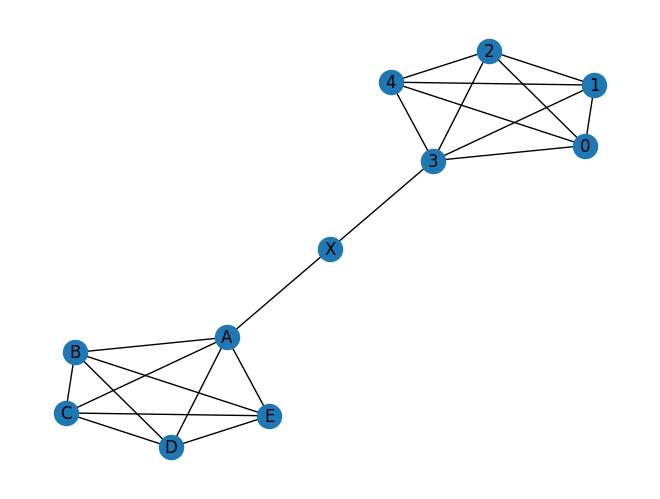

In [130]:
## Still on the combied graph G
nx.draw_kamada_kawai(G, with_labels= True)

## Eulerian Path
print('Eulerian Path:', list(nx.eulerian_path(G)))

Eulerian Circuit: [(0, 1), (1, 2), (2, 0), (0, 3), (3, 1), (1, 4), (4, 2), (2, 3), (3, 4), (4, 0)]


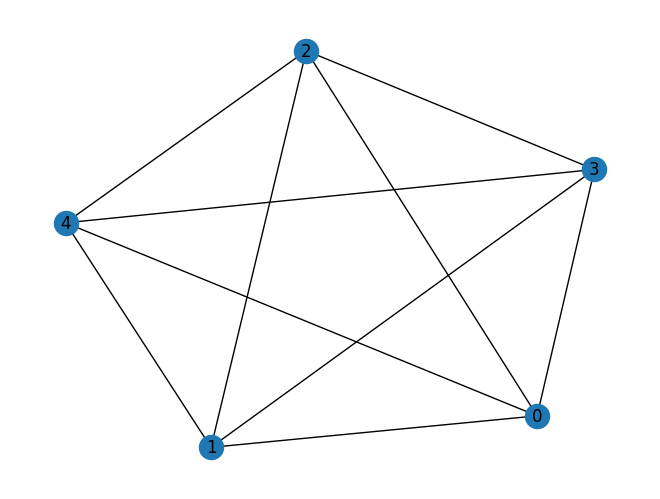

In [ ]:
## Eulerian Circuit is only possible on a complete graph
G1= nx.complete_graph(5)

nx.draw_spring(G1, with_labels= True)

print('Eulerian Circuit:', list(nx.eulerian_path(G1)))

